# Introduction to CoFI package

## Example 3: receiver function

### Step 1: import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cofi.cofi_objective.examples import ReceiverFunctionObjective, ReceiverFunction
from cofi.optimizers import ScipyOptimizerSolver

### Step 2: generate sample data

The actual forward operator is defined in the `ReceiverFunction` class. Instantiate a `ReceiverFunction` and call `calc()` method to generate sample data:

```python
rfc_fwd = ReceiverFunction()
t, rf_data = rfc_fwd.calc(model, sn=0.1)
```

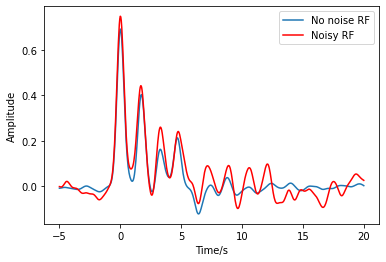

In [2]:
true_model = np.array(
    [[1, 4.0, 1.7], [3.5, 4.3, 1.7], [8.0, 4.2, 2.0], [20, 6, 1.7], [45, 6.2, 1.7]]
)

rfc_fwd = ReceiverFunction()
t, rf_data = rfc_fwd.calc(true_model, sn=0.1)
t2, rf_data2 = rfc_fwd.calc(
    true_model, sn=0.5
)  # Receiver function with added correlated noise
plt.plot(t, rf_data, label="No noise RF")
plt.plot(t2, rf_data2, "r-", label="Noisy RF")
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.legend()

### Step 3: define objective

In [3]:
model_guess = np.array(
    [[1, 4.0, 1.0], [3.5, 4.3, 1.7], [8.0, 4.2, 2.0], [20, 6, 1.7], [45, 6.2, 1.7]]
)
rfc_obj = ReceiverFunctionObjective(t, rf_data, model_guess)

### Step 4: solve

In [4]:
solver = ScipyOptimizerSolver(rfc_obj)
model = solver.solve("Nelder-Mead")
print(model.values())
print("misfit of true model:", rfc_obj.misfit(true_model))
print("misfit of solved model:", rfc_obj.misfit(model))

[ 1.0915417   4.00181876  1.66981223  3.28346724  4.20449821  1.73272539
  7.93588101  4.18535523  1.9895853  19.82795107  6.01755858  1.70960431
 44.37481471  6.22463412  1.73124431]
misfit of true model: 0.24312375
misfit of solved model: 0.22397417


----